In [1]:
## This file contains the basic function of cuffdiff analysis.
## Author: Xiang Li

###Sample
#### Imput Package
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from scipy import stats

In [2]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [3]:
#### This is a duplicate code of different data input.

PATH_FOLDER='/mnt/d/bioproject/Data/Haihui/Tcf1/Hdac/'
df = pd.read_excel(PATH_FOLDER+'Hdac_Treg_DEGs.xlsx', sheet_name='all DEGs',\
sep=',', header=1, usecols=['WT2_Treg_D20','WT1_Treg_D12', 'WT2_Treg_D12',\
'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het2_Treg_D20','Hdac12_KO1_Treg_D20', 'Hdac12_KO2_Treg_D20' ]) #, index_col= )
df=df.dropna(axis=0, how='any')
#df = df[(df >= 0).all(axis=1)]
#df=df.replace(0,0.000001)
df.index.name='gene_id'
df.shape
#df.head

(2041, 7)

In [3]:
PATH_FOLDER='/mnt/d/bioproject/Data/Haihui/Tcf1/Hdac/'
df = pd.read_excel(PATH_FOLDER+'Treg_all_genes_expression.xls', sheet_name='all_genes',\
sep='\t', header=0, usecols=['gene_id','WT1_Treg_D20', 'WT2_Treg_D20','Hdac1_KO1_Treg_D20', \
'Hdac1_KO2_Treg_D20', 'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het2_Treg_D20', 'Hdac12_KO1_Treg_D20',\
'Hdac12_KO2_Treg_D20', 'WT1_Treg_D12',  'WT2_Treg_D12', 'Hdac12_KO1_Treg_D12', 'Hdac12_KO2_Treg_D12']) #, index_col= )

df = pd.read_excel(PATH_FOLDER+'Treg_all_genes_expression.xls', sheet_name='all_genes',\
sep=',', header=0, usecols=['gene_id','WT2_Treg_D20','WT1_Treg_D12', 'WT2_Treg_D12',\
'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het2_Treg_D20','Hdac12_KO1_Treg_D20', 'Hdac12_KO2_Treg_D20' ]) #, index_col= )

df=df.dropna(axis=0, how='any')
#df = df[(df >= 0).all(axis=1)]
#df=df.replace(0,0.000001)
df.index.name='gene_id'
df.shape
#df.head

(23951, 8)

In [4]:
######## Choose data matched to gene list kept
diff_exps_gene_list = pd.read_excel( PATH_FOLDER +'/5_clusters_genes.xlsx', header=0) #\
#usecols=['up_and_up','up_and_no_change','up_and_down','down_and_down','down_and_nochange'])

### merge columns and label them accordingly.
gene_list=pd.DataFrame(columns=['gene_id','label'])
for condtion in (diff_exps_gene_list.columns): 
    tem_gene_list = {'gene_id': diff_exps_gene_list[condtion].dropna(axis=0,how='any'),
            'label': condtion}
    gene_list = gene_list.append( pd.DataFrame(tem_gene_list))

diff_exps_gene_list_df= df.merge(gene_list, on='gene_id')

diff_exps_gene_list_df = diff_exps_gene_list_df.dropna(axis=0, how='any')

#diff_exps_gene_list_df = diff_exps_gene_list_df.set_index('gene_id')



In [23]:
df_average_sorted = pd.DataFrame (columns=['gene_id','average_WT_Treg', 'average_Hdac12_KO_het_Treg', 'average_Hdac12_KO_Treg'])
df_average_sorted.loc[:,'gene_id'] = diff_exps_gene_list_df.loc[:,'gene_id']

### average columns of WT
df_average_sorted.loc[:,'average_WT_Treg'] = pd.DataFrame.mean(diff_exps_gene_list_df.loc[:, \
                        ['WT2_Treg_D20','WT1_Treg_D12', 'WT2_Treg_D12']], axis=1).values
### average of Hdac12_KO_het
df_average_sorted.loc[:,'average_Hdac12_KO_het_Treg'] = pd.DataFrame.mean(diff_exps_gene_list_df.loc[:, \
                        ['Hdac12_KO_het1_Treg_D20','Hdac12_KO_het2_Treg_D20']], axis=1).values

###average of KO

df_average_sorted.loc[:,'average_Hdac12_KO_Treg'] = pd.DataFrame.mean(diff_exps_gene_list_df.loc[:, \
                        ['Hdac12_KO1_Treg_D20','Hdac12_KO2_Treg_D20']], axis=1).values

#df_average_sorted = df_average_sorted.set_index('gene_id')

df_average_sorted.loc[:,'label'] = diff_exps_gene_list_df['label']

df_average_sorted = df_average_sorted.sort_values(by=['label'])

df_average_sorted.to_csv('average_columns_Hdac.csv', sep='\t')




(1164, 3)


{u'down_and_down': 'C0',
 u'down_and_nochange': 'C1',
 u'up_and_down': 'C2',
 u'up_and_no_change': 'C3',
 u'up_and_up': 'C4'}

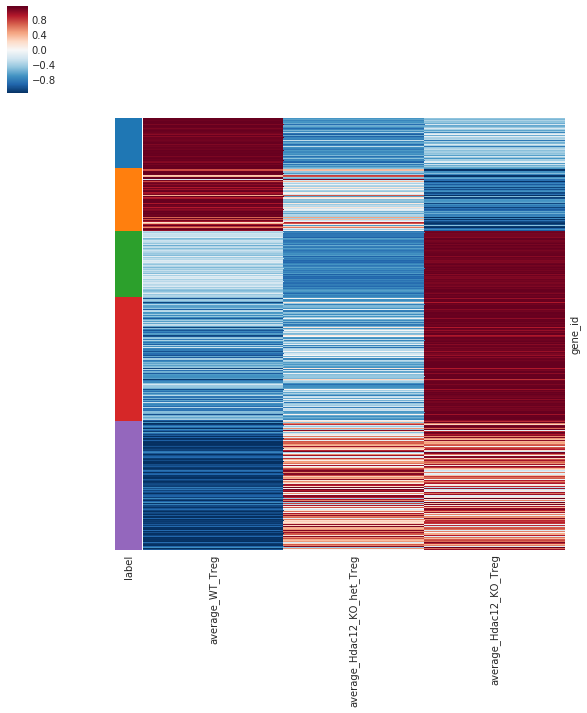

In [29]:
#### From raw clustered data with color bar

#### sort df via label and named df_sorted

df_sorted = diff_exps_gene_list_df.sort_values(by=['label'])

### Carry on with above data
df_sorted = df_average_sorted
###
df_sorted=df_sorted.set_index('gene_id')
df_sorted_label = df_sorted['label']
# Cluster Map following:

colors=[]
#colors=['red', 'orange', 'yellow', 'green', 'blue']
### OR Following Way to generate color.
for i in range(len(df_sorted_label.unique())):
    colors.append( "C"+ str(i))

#### generating color map, from label > color
lut = dict(zip(df_sorted_label.unique(), colors))
#### map color_label to every row of data
row_color = df_sorted['label'].map(lut)

df_sorted = df_sorted.drop(['label'], axis=1)

df_sorted = df_sorted.loc[:, ['average_WT_Treg', 'average_Hdac12_KO_het_Treg', 'average_Hdac12_KO_Treg'] ]



print(df_sorted.shape)



fig_1 = sns.clustermap( (df_sorted),  yticklabels=False, col_cluster=False,\
z_score=0, cmap="RdBu_r", row_cluster=False, row_colors = row_color ) # 


#ax = fig_1.add_subplot(1,1,1)
#ax.legend(lut)

Parameters_Detail= "5clusters_z_score=0"

fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')
lut

In [26]:
#df_average_sorted
#diff_exps_gene_list_df
#df_average_sorted.merge( diff_exps_gene_list_df[['label']], on='gene_id')


In [30]:
#plt.figure(lut)

df_sorted[df_sorted.index == 'Il15ra']

#df[df.index == 'Il15ra']
#diff_exps_gene_list

,WT2_Treg_D20,WT1_Treg_D12,WT2_Treg_D12,Hdac12_KO_het1_Treg_D20,Hdac12_KO_het2_Treg_D20,Hdac12_KO1_Treg_D20,Hdac12_KO2_Treg_D20
gene_id,,,,,,,
Il15ra,8.27299,4.70412,3.51587,7.69089,6.34035,13.6108,17.298


(1164, 7)


{u'down_and_down': 'C0',
 u'down_and_nochange': 'C1',
 u'up_and_down': 'C2',
 u'up_and_no_change': 'C3',
 u'up_and_up': 'C4'}

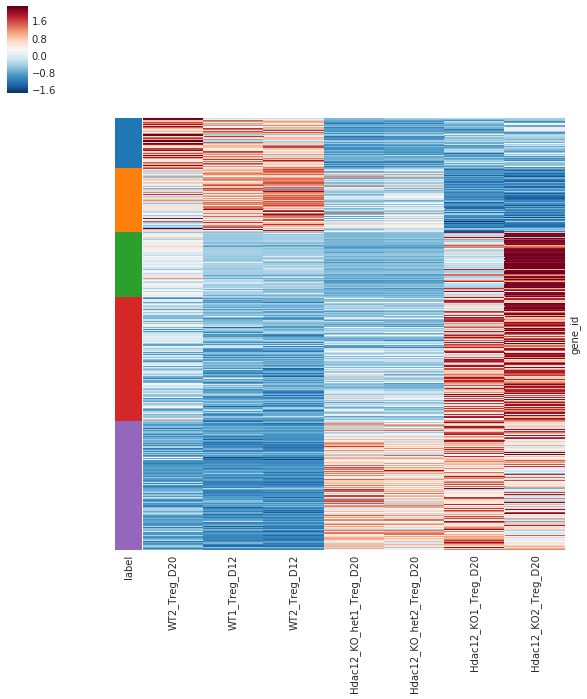

In [28]:
#### From raw clustered data with color bar

#### sort df via label and named df_sorted

df_sorted = diff_exps_gene_list_df.sort_values(by=['label'])

df_sorted=df_sorted.set_index('gene_id')
df_sorted_label = df_sorted['label']
# Cluster Map following:

colors=[]
#colors=['red', 'orange', 'yellow', 'green', 'blue']
### OR Following Way to generate color.
for i in range(len(df_sorted_label.unique())):
    colors.append( "C"+ str(i))

#### generating color map, from label > color
lut = dict(zip(df_sorted_label.unique(), colors))
#### map color_label to every row of data
row_color = df_sorted['label'].map(lut)

df_sorted = df_sorted.drop(['label'], axis=1)

df_sorted = df_sorted.loc[:, ['WT2_Treg_D20','WT1_Treg_D12', 'WT2_Treg_D12',\
'Hdac12_KO_het1_Treg_D20', 'Hdac12_KO_het2_Treg_D20','Hdac12_KO1_Treg_D20', 'Hdac12_KO2_Treg_D20' ] ]



print(df_sorted.shape)



fig_1 = sns.clustermap( (df_sorted),  yticklabels=False, col_cluster=False,\
z_score=0, cmap="RdBu_r", row_cluster=False, row_colors = row_color ) # 


#ax = fig_1.add_subplot(1,1,1)
#ax.legend(lut)

Parameters_Detail= "5clusters_z_score=0"

fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')
lut

(2041, 7)


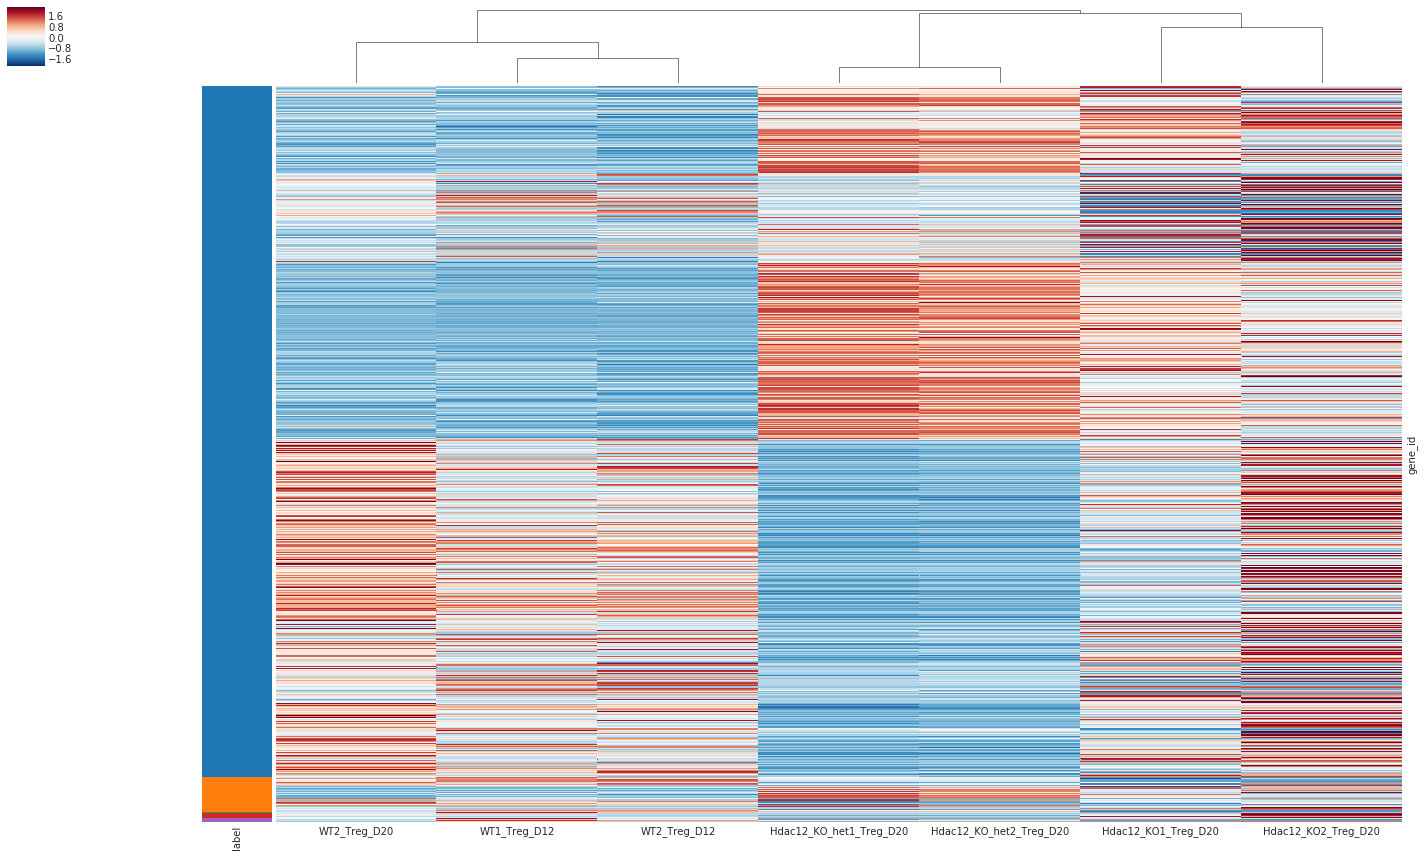

In [40]:
#### K means clusterring with side color bar.

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=None).fit(df.values)
df['label'] = kmeans.labels_

#### sort df via label and named df_sorted

df_sorted = df.sort_values(by=['label'])
df_sorted_label = df_sorted['label']
# Cluster Map following:

colors=[]
#colors=['red', 'orange', 'yellow', 'green', 'blue']
### OR Following Way to generate color.
for i in range(len(df_sorted_label.unique())):
    colors.append( "C"+ str(i))

#### generating color map, from label > color
lut = dict(zip(df_sorted_label.unique(), colors))
#### map color_label to every row of data
row_color = df_sorted['label'].map(lut)

df_sorted = df_sorted.drop(['label'], axis=1)

#df_sorted.index.name='gene_id'


print(df_sorted.shape)
fig_1 = sns.clustermap( (df_sorted),  yticklabels=False, col_cluster=True,\
z_score=0, cmap="RdBu_r", figsize=(25, 15), row_cluster=False, row_colors = row_color) # 


Parameters_Detail= "z_score=0"

fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')

In [3]:
#Functions to read cuffdiff outputs
def generate_genes_FPKM_df(fname, sample_name_dict):
    df = pd.read_csv(fname, sep='\t', header=0)
    
    FPKM_df = None
    for condition in set(df.condition):
        for replicate in set(df.replicate):
            temp_df = df[(df.condition == condition) & (df.replicate == replicate) & (df.FPKM >=1)].loc[:,['tracking_id', 'FPKM']]
            temp_df.rename(columns={'tracking_id': 'gene_id', 'FPKM': sample_name_dict[(condition, replicate)]}, inplace=True)
            if FPKM_df is None:
                FPKM_df = temp_df
            else:
                #FPKM_df = FPKM_df.merge(temp_df, on='gene_id')
                FPKM_df = FPKM_df.merge(temp_df, how='outer')
    FPKM_df = FPKM_df.dropna(axis=1, how='all')
    FPKM_df = FPKM_df.dropna(axis=0, how='any')
    return FPKM_df

In [4]:
#FPKM
################################################################################
WT_PATH='/home/lxiang/cloud_research/PengGroup/ZZeng/Data/Haihui/Tcf1/HP_RNAseq/cuffdiff/WT/'
WT_sample_name_dict = {('WT_CD8_0h', 0): 'WT1_CD8_0h', ('WT_CD8_0h', 1): 'WT2_CD8_0h', \
                       ('WT_CD8_72h', 0): 'WT1_CD8_72h', ('WT_CD8_72h', 1): 'WT2_CD8_72h' }
WT_FPKM_df = generate_genes_FPKM_df(WT_PATH+'genes.read_group_tracking', WT_sample_name_dict)
################################################################################
################################################################################
DKO_PATH='/home/lxiang/cloud_research/PengGroup/ZZeng/Data/Haihui/Tcf1/HP_RNAseq/cuffdiff/DKO/'
DKO_sample_name_dict = {('DKO_CD8_0h', 0): 'DKO1_CD8_0h', ('DKO_CD8_0h', 1): 'DKO2_CD8_0h', \
                    ('DKO_CD8_72h', 0): 'DKO1_CD8_72h', ('DKO_CD8_72h', 1): 'DKO2_CD8_72h'}
DKO_FPKM_df = generate_genes_FPKM_df( DKO_PATH+'genes.read_group_tracking', DKO_sample_name_dict)
################################################################################
################################################################################
Ctrl_PATH='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/Mar2018/Cuffdiff_Results/Ctrl-n_Ctrl-s/'
Ctrl_sample_name_dict = {('Ctrl-n', 0): 'Ctrl-3n', ('Ctrl-n', 1): 'Ctrl-4n', \
                       ('Ctrl-s', 0): 'Ctrl-3s', ('Ctrl-s', 1): 'Ctrl-3s_fake' }
Ctrl_FPKM_df = generate_genes_FPKM_df(Ctrl_PATH+'genes.read_group_tracking', Ctrl_sample_name_dict)
################################################################################
################################################################################
dKO_PATH='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/Mar2018/Cuffdiff_Results/dKO-n_dKO-s/'
dKO_sample_name_dict = {('dKO-n', 0): 'dKO-3n', ('dKO-n', 1): 'dKO-4n', \
                    ('dKO-s', 0): 'dKO-3s' , ('dKO-s', 1): 'dKO-3s_fake'}
dKO_FPKM_df = generate_genes_FPKM_df(dKO_PATH+'genes.read_group_tracking', dKO_sample_name_dict)
################################################################################
################################################################################

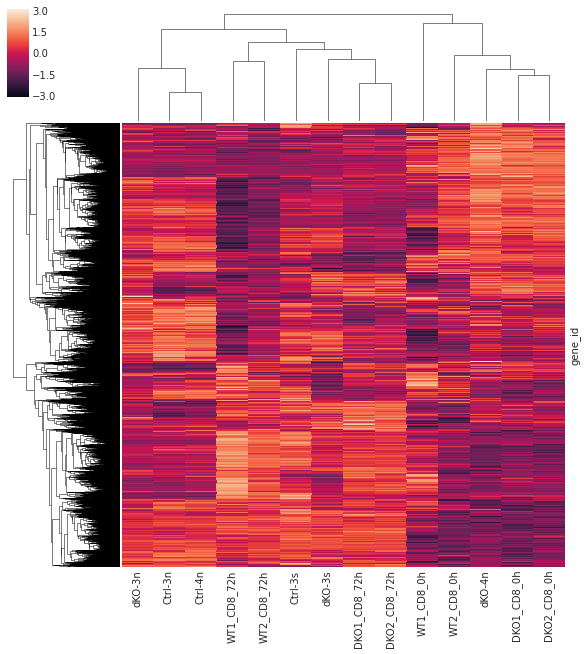

In [16]:
#### FPKM Merge and heatmap
FPKM_df = WT_FPKM_df.merge(DKO_FPKM_df, on='gene_id')
FPKM_df = FPKM_df.merge(Ctrl_FPKM_df, on='gene_id')
FPKM_df = FPKM_df.merge(dKO_FPKM_df, on='gene_id')

FPKM_df = FPKM_df.loc[:,['gene_id','WT1_CD8_0h','WT2_CD8_0h','Ctrl-3n', 'Ctrl-4n', 'DKO1_CD8_0h', 'DKO2_CD8_0h', 'dKO-3n', 'dKO-4n', 'WT1_CD8_72h','WT2_CD8_72h','Ctrl-3s', 'DKO1_CD8_72h', 'DKO2_CD8_72h', 'dKO-3s']]
#FPKM_df.head
FPKM_df=FPKM_df.set_index('gene_id')

#np.log1p(FPKM_df) 
#### This command is only valid for NaN item.
#FPKM_df=FPKM_df.fillna(0)
#FPKM_df
fig_1 = sns.clustermap( np.log1p(FPKM_df),  yticklabels=False, col_cluster=True, z_score=0, cmap="RdBu_r" )
#fig_1 = sns.clustermap( np.log1p(FPKM_df),  yticklabels=False ) #, col_cluster=True,)
#fig_2 = sns.clustermap(FPKM_df, col_cluster=False, yticklabels=False, z_score=0)
#fig_1.savefig('Heatmap1_'+Folder_Name+'.png')
#fig_2.savefig('Heatmap2_'+Folder_Name+'.png')